In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
festivales_bcn_18 = pd.read_pickle("./data/festivales_bcn_18_procesado.pkl")

In [71]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [72]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [73]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [74]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [75]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [76]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [77]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [78]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [79]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [80]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [81]:
festivales_bcn_18.describe().loc["mean"]

Edicio           14.418182
Asistentes    40580.000000
Name: mean, dtype: float64

In [82]:
festivales_bcn_18.describe().loc["50%"]

Edicio           11.0
Asistentes    14100.0
Name: 50%, dtype: float64

In [83]:
festivales_bcn_18.describe().loc["max"]

Edicio            50.0
Asistentes    290522.0
Name: max, dtype: float64

In [84]:
festivales_bcn_18.describe().loc["min"]

Edicio           1.0
Asistentes    1687.0
Name: min, dtype: float64

In [85]:
festivales_bcn_18[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Otoño
Entrada,De Pago


Comentarios <br>
Com una mediana de unos 14 mil asistntes, el festival tipo de Barcelona es de música y con entrada pagada, con mayorpredominancia en otoño, aunque mayor concentración en junio.

Frecuencias relativa y absoluta

In [86]:
for catego in categoricas_destacadas:
    print(festivales_bcn_18[catego].value_counts())
    print("\n")

Ambit
Música                         19
Audiovisuals                   14
Arts visuals                    7
Multidisciplinaris i altres     7
Arts escèniques                 5
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    43
Pública    11
Mixta       1
Name: count, dtype: int64


Mes
Junio         10
Noviembre      8
Marzo          5
Octubre        5
Septiembre     5
Enero          5
Julio          5
Mayo           4
Abril          3
Febrero        2
Agosto         2
Diciembre      1
Name: count, dtype: int64


Estacion
Otoño        18
Primavera    15
Invierno     12
Verano       10
Name: count, dtype: int64


Entrada
De Pago    39
Gratis     14
Mixta       2
Name: count, dtype: int64




Comentarios <br>


In [88]:
for catego in categoricas_destacadas:
    print(festivales_bcn_18[catego].value_counts()/len(festivales_bcn_18)*100)
    print("\n")

Ambit
Música                         34.545455
Audiovisuals                   25.454545
Arts visuals                   12.727273
Multidisciplinaris i altres    12.727273
Arts escèniques                 9.090909
Lletres                         5.454545
Name: count, dtype: float64


Titularidad
Privada    78.181818
Pública    20.000000
Mixta       1.818182
Name: count, dtype: float64


Mes
Junio         18.181818
Noviembre     14.545455
Marzo          9.090909
Octubre        9.090909
Septiembre     9.090909
Enero          9.090909
Julio          9.090909
Mayo           7.272727
Abril          5.454545
Febrero        3.636364
Agosto         3.636364
Diciembre      1.818182
Name: count, dtype: float64


Estacion
Otoño        32.727273
Primavera    27.272727
Invierno     21.818182
Verano       18.181818
Name: count, dtype: float64


Entrada
De Pago    70.909091
Gratis     25.454545
Mixta       3.636364
Name: count, dtype: float64




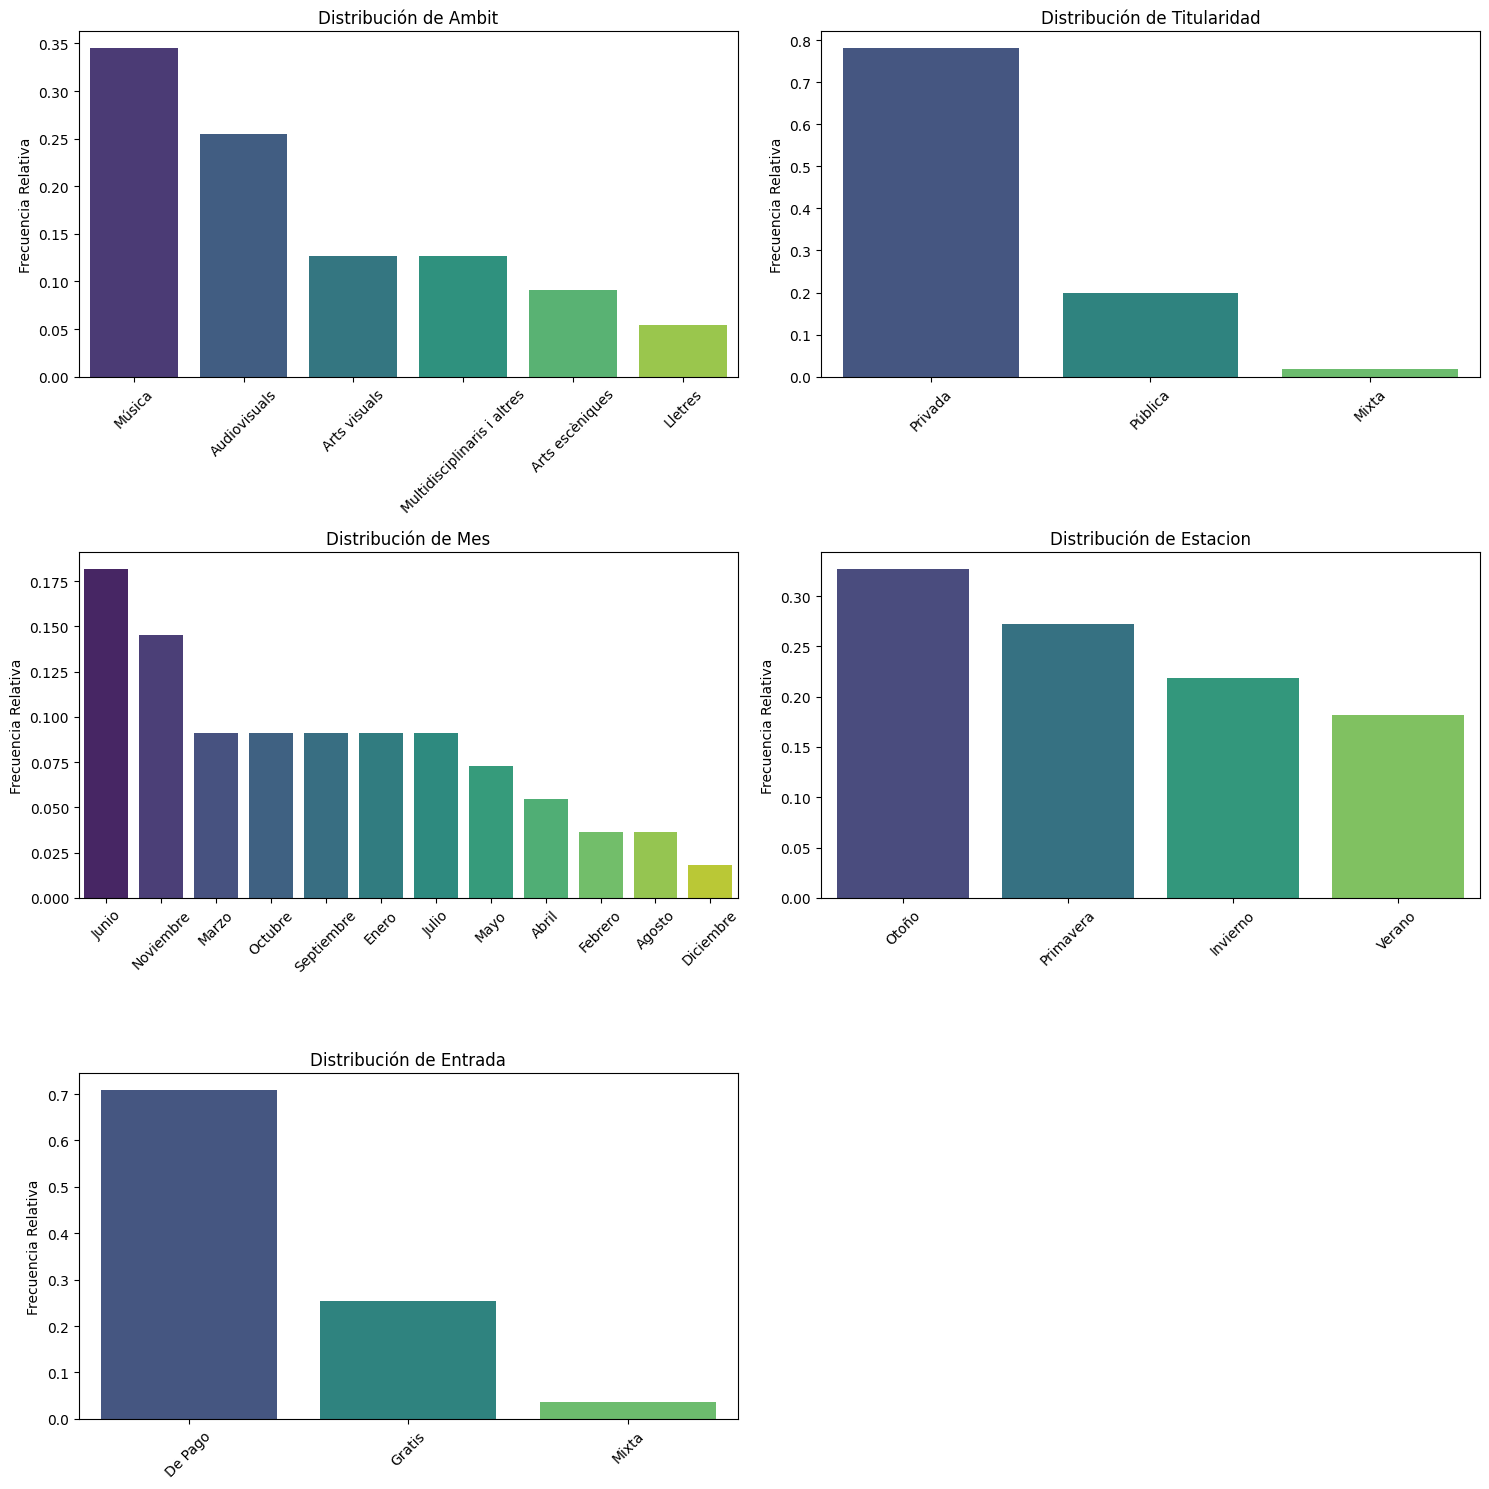

In [103]:
pinta_distribucion_categoricas(festivales_bcn_18, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado casi triplica las del sector público, y proporción de festivales gratuitos vs. de pago es de algo más del doble.<br>
Es el último año en que vemos festivales programados todos los meses.Cambia la tendencia en cuanto a que cobra claro predominio el otoño. Muy tímida programación en diciembre, pero ya algo. <br>
La música es sin duda la protagonista de los festivales, seguida de lejos por los audivisuales

Medidas de posición

In [89]:
festivales_bcn_18.describe()

,Edicio,Asistentes
count,55.000000,55.000000
mean,14.418182,40580.000000
std,10.305861,59885.341702
min,1.000000,1687.000000
25%,7.000000,7266.000000
50%,11.000000,14100.000000
75%,21.500000,39000.000000
max,50.000000,290522.000000


In [90]:
get_IQR(festivales_bcn_18,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

14.5

In [91]:
print(festivales_bcn_18["Edicio"].quantile(0.5), "\n",
    festivales_bcn_18["Edicio"].quantile(0.9), "\n",
    festivales_bcn_18["Edicio"].quantile(0.95), "\n",
    festivales_bcn_18["Edicio"].max())

11.0 
 26.0 
 29.599999999999994 
 50.0


In [92]:
get_IQR(festivales_bcn_18,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

31734.0

In [93]:
print(festivales_bcn_18["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_18["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_18["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_18["Asistentes"].max())

14100.0 
 123951.6 
 151799.9999999999 
 290522.0


Comentarios <br>
Alta dispersión en el número de asistentes. La mediana está en 14.000, que muestra un crecimiento sostenido desde el inicio del período analizado. El primer 90% en algo más de 120 mil, que se mantiene más o menos estable hasta el 95%, y luego de un buen salto de mas del soble haciael final, llegando casi a los 300 mil. La máxima es unas 20 veces la mediana

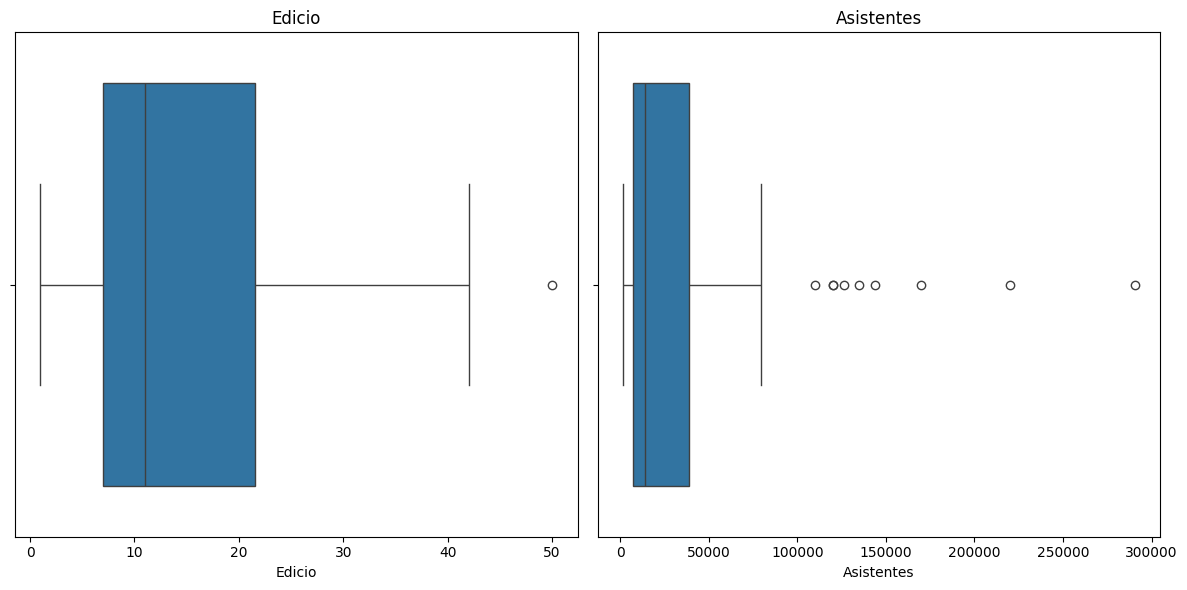

In [94]:
plot_multiple_boxplots(festivales_bcn_18, columnas_numericas_fests)

Comentarios <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes.

In [95]:
plot_boxplot_grouped(festivales_bcn_18, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [96]:
festivales_bcn_18.describe().loc[["std", "mean"]].T

,std,mean
Edicio,10.305861,14.418182
Asistentes,59885.341702,40580.000000


In [97]:
variabilidad(festivales_bcn_18)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,10.305861,14.418182,0.714782
Asistentes,59885.341702,40580.000000,1.475735


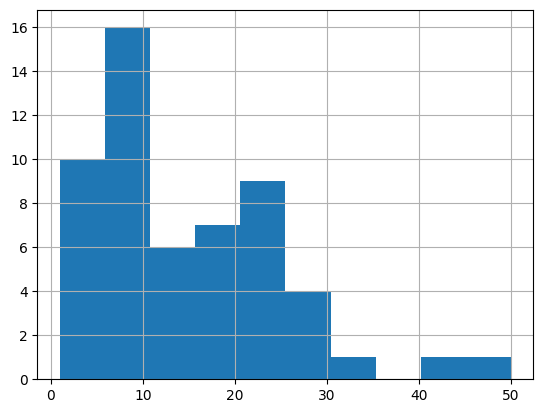

In [98]:
festivales_bcn_18["Edicio"].hist();

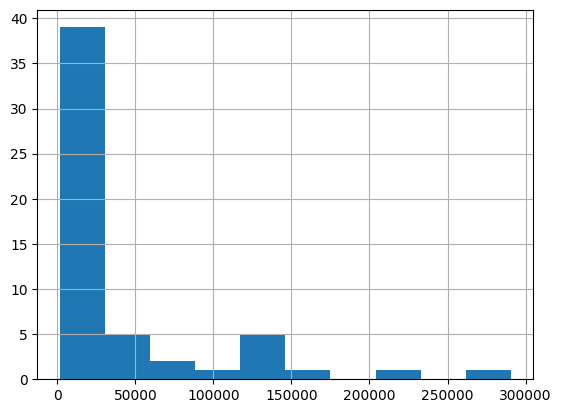

In [99]:
festivales_bcn_18["Asistentes"].hist();

Distribución

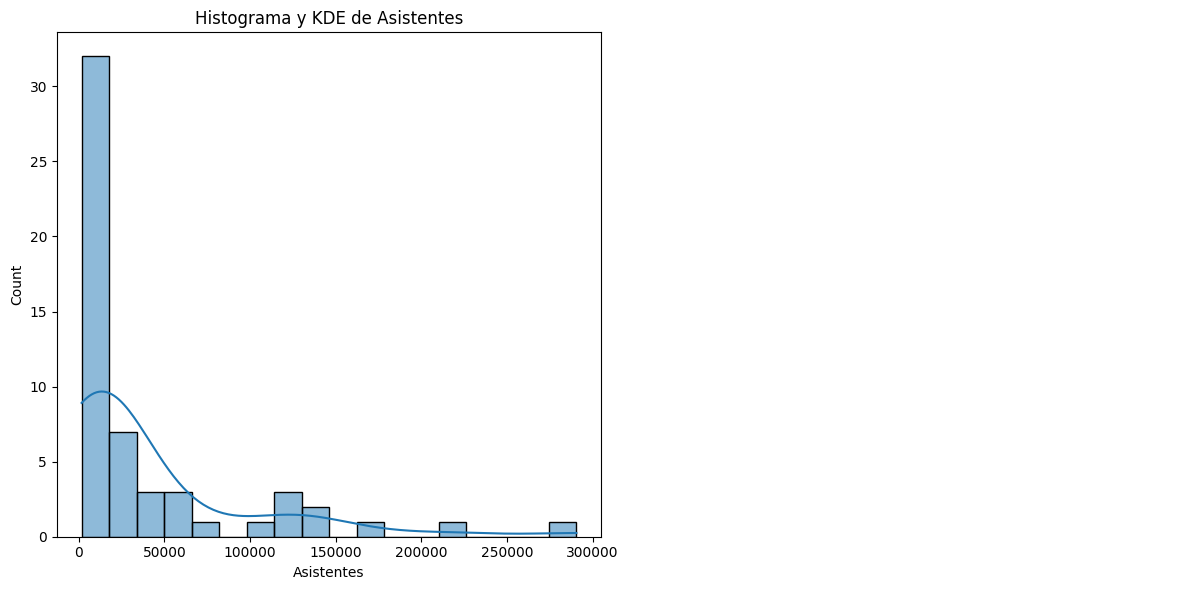

In [100]:
plot_histo_den(festivales_bcn_18, ["Asistentes"])

Anomalías outliers

(2,)


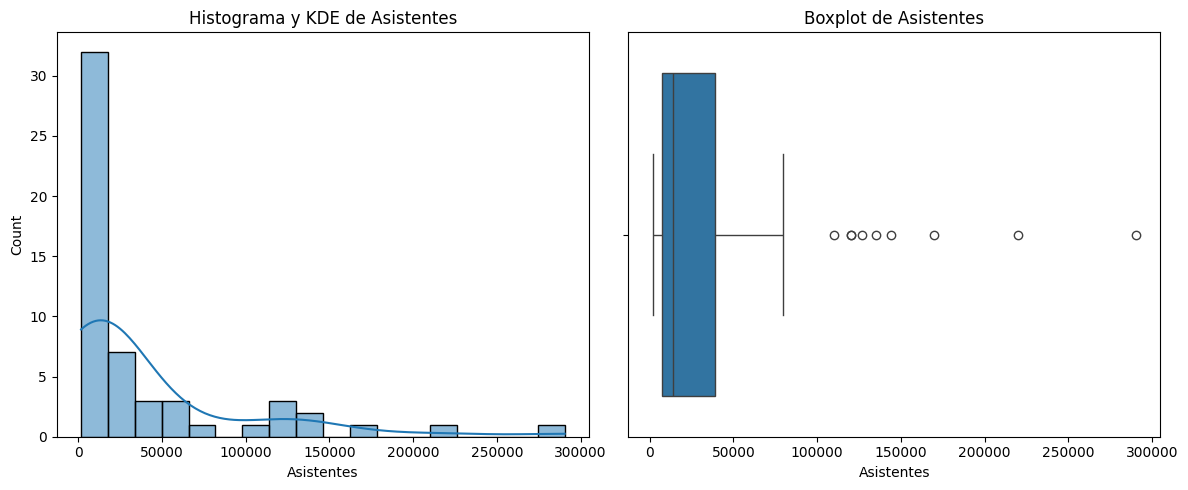

In [101]:
plot_combined_graphs(festivales_bcn_18, ["Asistentes"])

In [105]:
festivales_bcn_18 = festivales_bcn_18.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_18.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

De Pago: 6 - 60.00%
Gratis: 3 - 30.00%
Mixta: 1 - 10.00%


In [104]:
festivales_bcn_18

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
43,Arts escèniques,9.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Otoño,290522.0,Gratis
49,Música,18.0,Primavera Sound,Privada,Mayo,Primavera,220000.0,De Pago
38,Multidisciplinaris i altres,7.0,Llum BCN,Pública,Febrero,Invierno,170000.0,Gratis
55,Música,50.0,Voll-Damm Festival de Jazz de Barcelona,Privada,Abril,Primavera,144000.0,De Pago
13,Música,7.0,Brunch-in the City,Privada,Marzo,Invierno,135000.0,De Pago
53,Música,25.0,Sónar. Festival Internacional de Música Avança...,Privada,Junio,Primavera,126586.0,De Pago
39,Arts visuals,16.0,Loop Festival,Privada,Noviembre,Otoño,120000.0,De Pago
18,Arts visuals,6.0,DOCfield. Festival de Fotografia Documental,Privada,Noviembre,Otoño,120000.0,De Pago
32,Arts escèniques,42.0,Grec Festival de Barcelona,Pública,Julio,Verano,109868.0,Mixta
4,Música,26.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Otoño,79438.0,Gratis
